In [1]:
from pyreax.reax_bo import ReaxBO
import numpy as np

import matplotlib.pyplot as plt

# Atomic an bond data

This notebook shows bow to use the `ReaxBO` class to read bonds and bond order results
computed by the ``reaxff/bonds`` fix of LAMMPS. 

## Load data

In [2]:
rbo = ReaxBO(
    "../test_files/bonds.dat", 
    "../test_files/ClBz.data", 
    elements=["C", "H", "Cl"]
)

## Data frames

The `atom_data` data frame provides, for each time step, the atomic data read
in the file.

* `nb` is the number of bonds
* `abo` is the sum of bond order over all bonds of the atom
* `q` is the atomic charge
* `nlp` is the number of lone pair

In [3]:
rbo.atom_data.head()

step  iat  itype element  nb    abo      q  nlp
0     0    1      1       C   3  3.817  0.072  0.0
1     0    2      1       C   3  3.754  0.041  0.0
2     0    3      1       C   3  3.870  0.015  0.0
3     0    4      1       C   3  3.887  0.016  0.0
4     0    5      1       C   3  3.805  0.023  0.0

In [4]:
rbo.atom_data[rbo.atom_data.step == 0]

step   iat  itype element  nb    abo      q  nlp
0        0     1      1       C   3  3.817  0.072  0.0
1        0     2      1       C   3  3.754  0.041  0.0
2        0     3      1       C   3  3.870  0.015  0.0
3        0     4      1       C   3  3.887  0.016  0.0
4        0     5      1       C   3  3.805  0.023  0.0
...    ...   ...    ...     ...  ..    ...    ...  ...
6475     0  6476      2       H   1  0.946  0.132  0.0
6476     0  6477      2       H   1  0.952  0.095  0.0
6477     0  6478      2       H   1  0.973  0.042  0.0
6478     0  6479      2       H   1  0.946  0.067  0.0
6479     0  6480      2       H   1  0.946  0.150  0.0

[6480 rows x 8 columns]

In [8]:
rbo.atom_data.step.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
rbo.connectivity[0]

{(3578, 3582),
 (1129, 1131),
 (3016, 3024),
 (4948, 4956),
 (6388, 6389),
 (4201, 4204),
 (1359, 1364),
 (5247, 5252),
 (4730, 4733),
 (1982, 1986),
 (904, 905),
 (3352, 3360),
 (4792, 4793),
 (3651, 3656),
 (5583, 5588),
 (894, 897),
 (3134, 3137),
 (853, 859),
 (5066, 5069),
 (2318, 2322),
 (6206, 6210),
 (3688, 3696),
 (5128, 5129),
 (99, 104),
 (1706, 1714),
 (3987, 3992),
 (1189, 1195),
 (3470, 3473),
 (5077, 5083),
 (5080, 5088),
 (3999, 4002),
 (690, 693),
 (110, 118),
 (4862, 4865),
 (2042, 2050),
 (5416, 5424),
 (5715, 5720),
 (4335, 4338),
 (1026, 1029),
 (446, 454),
 (5198, 5201),
 (3820, 3828),
 (2739, 2742),
 (6051, 6056),
 (1321, 1327),
 (1362, 1365),
 (5209, 5215),
 (243, 246),
 (4131, 4134),
 (5596, 5597),
 (2754, 2757),
 (2174, 2182),
 (4455, 4460),
 (6062, 6070),
 (1093, 1096),
 (1657, 1663),
 (3938, 3941),
 (5545, 5551),
 (4467, 4470),
 (1158, 1161),
 (578, 586),
 (5046, 5049),
 (2510, 2518),
 (6398, 6406),
 (61, 67),
 (2871, 2874),
 (4803, 4806),
 (1494, 1497),
 (3

In [4]:
# focus on atom 1 over all time steps
rbo.atom_data[rbo.atom_data["iat"] == 1]

step  iat  itype element  nb    abo      q  nlp
0         0    1      1       C   3  3.817  0.072  0.0
6480      1    1      1       C   3  3.816  0.072  0.0
12960     2    1      1       C   3  3.815  0.072  0.0
19440     3    1      1       C   3  3.813  0.072  0.0
25920     4    1      1       C   3  3.811  0.072  0.0
32400     5    1      1       C   3  3.809  0.072  0.0
38880     6    1      1       C   3  3.807  0.072  0.0
45360     7    1      1       C   3  3.805  0.072  0.0
51840     8    1      1       C   3  3.803  0.072  0.0
58320     9    1      1       C   3  3.801  0.072  0.0
64800    10    1      1       C   3  3.799  0.072  0.0

The `bond_data` data frame provides, for each time step and for each atom
the bonds with their associated bond order.

In [5]:
rbo.bond_data.head(10)

step  iat  itype ielement  nb  jat  jtype jelement  bond  bond_order
0     0    1      1        C   3    3      1        C   C-C       1.495
1     0    1      1        C   3    4      1        C   C-C       1.477
2     0    1      1        C   3    7      3       Cl  C-Cl       0.837
3     0    2      1        C   3    5      1        C   C-C       1.440
4     0    2      1        C   3    6      1        C   C-C       1.361
5     0    2      1        C   3   10      2        H   C-H       0.946
6     0    3      1        C   3    6      1        C   C-C       1.390
7     0    3      1        C   3    8      2        H   C-H       0.939
8     0    4      1        C   3    5      1        C   C-C       1.420
9     0    4      1        C   3   12      2        H   C-H       0.950

From the `"bond"` column you can list all existing bonds in the simulation
box.

In [6]:
rbo.bond_data.bond.unique()

array(['C-C', 'C-Cl', 'C-H'], dtype=object)

## Examples

In [7]:
# focus on C-Cl bonds:
df_CCl = rbo.bond_data[rbo.bond_data.bond == "C-Cl"]

# for each time step, compute, the mean and std of C-Cl bond order
df = df_CCl.groupby("step").agg({"bond_order": ["mean", "std"]})
df.columns = df.columns.droplevel(0)
df

mean       std
step                    
0     0.843198  0.023306
1     0.843217  0.023293
2     0.843263  0.023270
3     0.843320  0.023250
4     0.843435  0.023182
5     0.843567  0.023151
6     0.843702  0.023089
7     0.843861  0.023062
8     0.844046  0.023005
9     0.844187  0.022927
10    0.844346  0.022828

(0.0, 1.0)

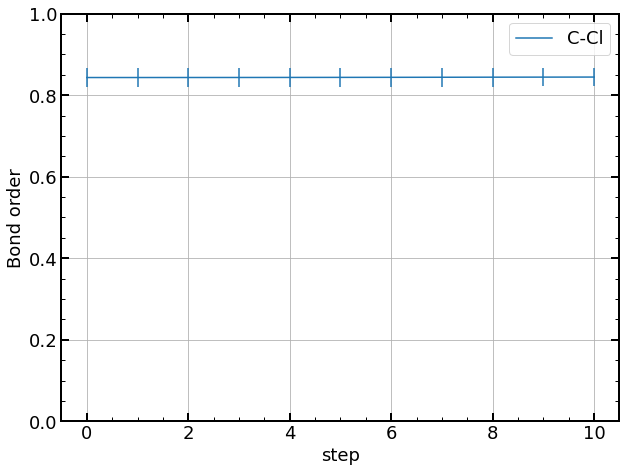

In [8]:
# plot the evolution of the average bond order of C-Cl bonds
ax = df.plot(y="mean", yerr="std", label="C-Cl")
ax.set_ylabel("Bond order")
ax.set_ylim(0, 1)

In [10]:
# using a pivot table compute the number of bonds of each kind.
# display the number of bonds per molecule
N_mol = 540  # 540 molecules
dftype = rbo.bond_data.pivot_table(index="step", columns="bond", values="iat", aggfunc="count")
dftype /= N_mol
dftype 

bond  C-C  C-Cl  C-H
step                
0     6.0   1.0  5.0
1     6.0   1.0  5.0
2     6.0   1.0  5.0
3     6.0   1.0  5.0
4     6.0   1.0  5.0
5     6.0   1.0  5.0
6     6.0   1.0  5.0
7     6.0   1.0  5.0
8     6.0   1.0  5.0
9     6.0   1.0  5.0
10    6.0   1.0  5.0

Focus on the atomic charges over the simulation.

Compute, for each time step and each element, the average and std of the
atomic charges.

In [11]:
dfq = rbo.atom_data.groupby(["step", "element"]).agg({"q": ["mean", "std"]})
dfq.reset_index(inplace=True)
dfq.columns = ["step", "el", "q_mean", "q_std"]
dfq

step  el    q_mean     q_std
0      0   C -0.003383  0.042665
1      0  Cl -0.424419  0.038515
2      0   H  0.088944  0.032352
3      1   C -0.003383  0.042669
4      1  Cl -0.424409  0.038522
5      1   H  0.088949  0.032351
6      2   C -0.003383  0.042670
7      2  Cl -0.424406  0.038519
8      2   H  0.088946  0.032357
9      3   C -0.003385  0.042666
10     3  Cl -0.424407  0.038520
11     3   H  0.088946  0.032359
12     4   C -0.003390  0.042668
13     4  Cl -0.424417  0.038514
14     4   H  0.088951  0.032355
15     5   C -0.003391  0.042672
16     5  Cl -0.424420  0.038520
17     5   H  0.088950  0.032354
18     6   C -0.003387  0.042676
19     6  Cl -0.424424  0.038516
20     6   H  0.088949  0.032356
21     7   C -0.003388  0.042675
22     7  Cl -0.424422  0.038524
23     7   H  0.088952  0.032352
24     8   C -0.003392  0.042672
25     8  Cl -0.424411  0.038516
26     8   H  0.088956  0.032349
27     9   C -0.003397  0.042675
28     9  Cl -0.424411  0.038522
29     9   H  0.088969  0.032345
30    10   C -0.003397  0.042674
31    10  Cl -0.424419  0.038525
32    10   H  0.088966  0.032337

Text(0, 0.5, 'atomic charge')

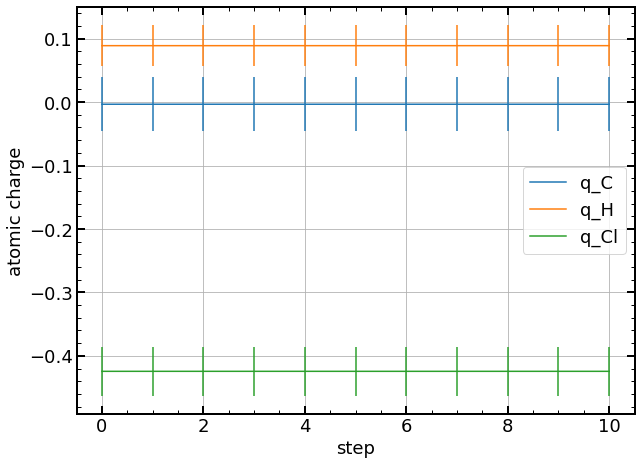

In [12]:
# plot charges
ax = plt.subplot(111)
for el in ["C", "H", "Cl"]:
    ax = dfq[dfq.el == el].plot(
        x="step", y="q_mean", yerr="q_std", ax=ax,
        label=f"q_{el}"
    )

# ax.set_ylim(-.6, -.2)
ax.set_ylabel("atomic charge")